# Brent Oil Price Analysis
## Task 1: Exploratory Data Analysis (EDA)

### 📌 Objective
To understand the historical trends, assess data quality, and determine the statistical properties of Brent oil prices spanning from **1987 to 2022**.

---

### 🛠️ Key Activities

#### 1. Data Quality Assessment
- [ ] **Missing Values:** Identify gaps in the time series.
- [ ] **Outliers:** Detect extreme price fluctuations (e.g., 2008 financial crisis, 2020 COVID-19 crash).
- [ ] **Data Consistency:** Ensure date formats are uniform and prices are numerical.

#### 2. Historical Trend Analysis
- **Long-term Trends:** Visualizing price movements over the decades.
- **Volatility Check:** Identifying periods of high vs. low market stability.
- **Event Impact:** Mapping major geopolitical events to significant price shifts.

#### 3. Statistical Properties
| Property | Description |
| :--- | :--- |
| **Stationarity** | Checking if mean/variance are constant over time (ADF Test). |
| **Seasonality** | Identifying recurring patterns within months or quarters. |
| **Distribution** | Analyzing the frequency of price points (Skewness & Kurtosis). |

---

### 📈 Expected Visualizations
*   **Time Series Plot:** Line chart of price vs. time.
*   **Moving Averages:** 50-day and 200-day SMA to smooth out noise.
*   **Box Plots:** To visualize annual price distributions and outliers.
*   **Autocorrelation (ACF/PACF):** To understand price dependencies on previous days.

---
> **Next Step:** Once the EDA is complete, the insights will be used to guide the time-series forecasting models in Task 2.


c:\Users\YODAHE\Desktop\10Academy-Week10\brent-oil-price-analysis\scripts\data_utils.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
INFO: Data loaded and cleaned successfully.


<Axes: title={'center': 'Brent Oil Prices (Refactored Loading)'}, xlabel='Date'>

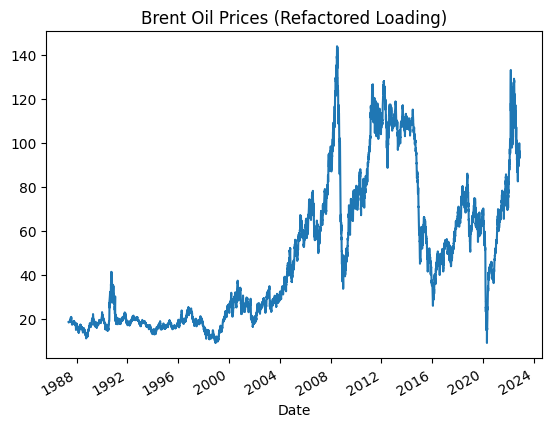

In [2]:
import sys
import os

# Add the scripts directory to path so we can import our modules
sys.path.append(os.path.abspath('../scripts'))

from data_utils import load_and_clean_data, calculate_returns

# Use the professional functions
df = load_and_clean_data('../data/BrentOilPrices.csv')
df = calculate_returns(df)

# EDA Plotting
df['Price'].plot(title="Brent Oil Prices (Refactored Loading)")

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

# Set plot style for consistency
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (15, 6)

1. Data Loading and Cleaning
We load the dataset, ensure the Date column is in the correct datetime format, and set it as the index for time-series analysis.

In [45]:
df = pd.read_csv('../data/BrentOilPrices.csv')

# Convert date and handle the 'DD-Mon-YY' format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.sort_values('Date', inplace=True)
df.set_index('Date', inplace=True)

# Display basic information
df.info()
df.head()

C:\Users\YODAHE\AppData\Local\Temp\ipykernel_27028\2376618702.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)


<class 'pandas.DataFrame'>
DatetimeIndex: 9011 entries, 1987-05-20 to 2022-11-14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   9011 non-null   float64
dtypes: float64(1)
memory usage: 140.8 KB


,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


2. Handling Missing Values
In financial time series, missing values (often from weekends or holidays) are common. We use Forward Fill to carry the last known price forward.

In [46]:
# Check for nulls
print(f"Missing values before cleaning: {df.isnull().sum().sum()}")

# Apply forward fill
df = df.ffill()

# Confirm cleaning
print(f"Missing values after cleaning: {df.isnull().sum().sum()}")

Missing values before cleaning: 0
Missing values after cleaning: 0


3. Visualizing Price Trends
We plot the raw Brent oil prices over the entire period to visually identify major shifts, spikes, and historical crashes.

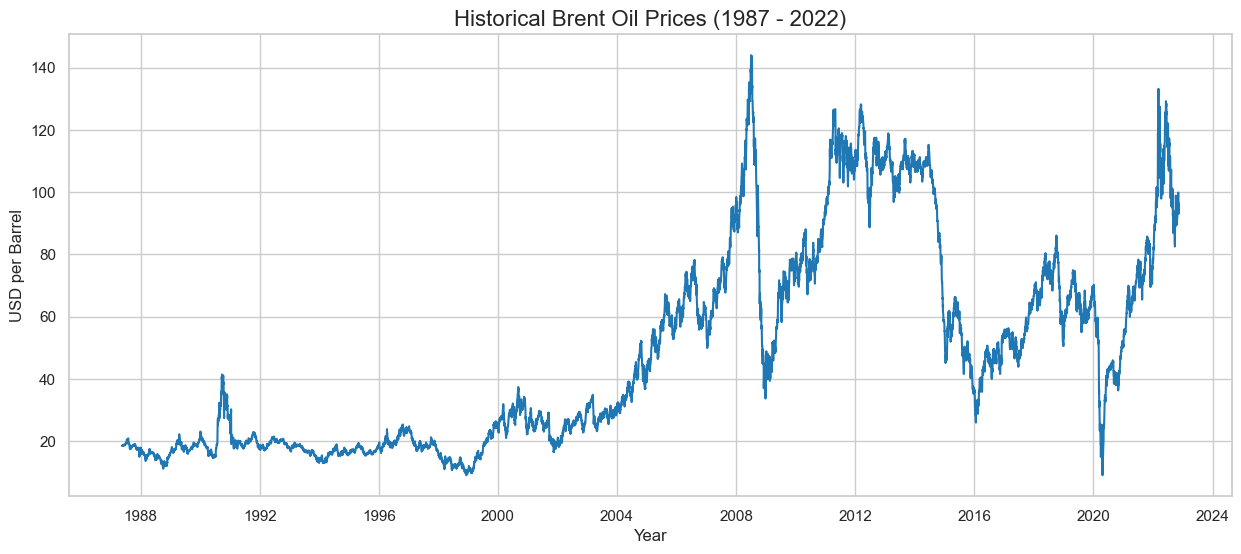

In [47]:
plt.plot(df['Price'], color='tab:blue', linewidth=1.5)
plt.title('Historical Brent Oil Prices (1987 - 2022)', fontsize=16)
plt.ylabel('USD per Barrel')
plt.xlabel('Year')
plt.show()

4. Stationarity Testing
A stationary time series has a constant mean and variance. Most financial models (and Change Point detection) need to know if the series is stationary. We use the Augmented Dickey-Fuller (ADF) test.

In [48]:
def check_stationarity(series):
    result = adfuller(series.dropna())
    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    if result[1] <= 0.05:
        print("Conclusion: The data is Stationary.")
    else:
        print("Conclusion: The data is Non-Stationary (Trend exists).")

check_stationarity(df['Price'])

ADF Statistic: -1.9939
p-value: 0.2893
Conclusion: The data is Non-Stationary (Trend exists).


5. Volatility and Daily Returns
Since raw prices are often non-stationary, we calculate Percentage Returns. This helps us see "Volatility Clustering"—periods where prices change rapidly.

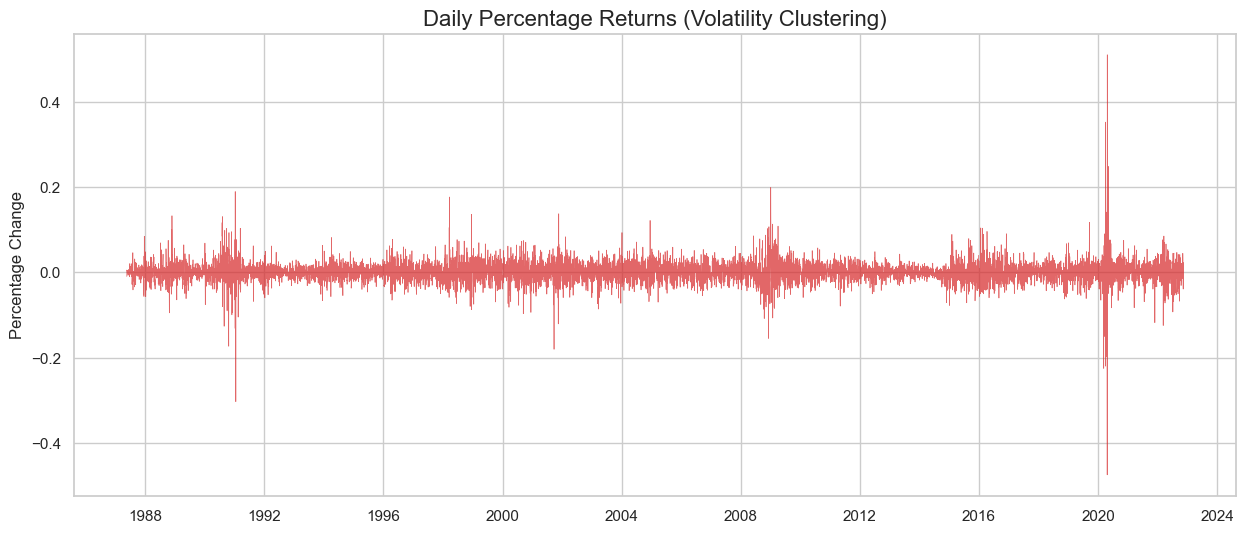

In [49]:
# Calculate daily percentage change
df['Returns'] = df['Price'].pct_change()

plt.plot(df['Returns'], color='tab:red', alpha=0.7, linewidth=0.5)
plt.title('Daily Percentage Returns (Volatility Clustering)', fontsize=16)
plt.ylabel('Percentage Change')
plt.show()

6. Summary of Findings
Trend: The oil price shows significant structural breaks (e.g., 2008 crash, 2014 drop, 2020 pandemic).
Stationarity: The raw price is non-stationary, which justifies the use of a Change Point Model to detect shifts in the mean.
Volatility: High volatility is observed around major geopolitical events, which we will analyze in Task 2.